In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [7]:
model = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
#downloaded movenet model
#it's a ready open source model to detect poses
movenet = model.signatures['serving_default']

In [39]:
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image)
    input_image = tf.image.resize_with_pad(image, 256, 256)
    input_image = tf.cast(input_image, dtype=tf.int32)
    input_image = tf.expand_dims(input_image, axis=0)
    return input_image
#function to prepair images

In [41]:
def extract_keypoints(image_path):
    input_image = preprocess_image(image_path)
    # Run pose estimation
    outputs = movenet(input_image)
    keypoints = outputs['output_0'].numpy()
    keypoints = keypoints.reshape(17, 3)  
    return keypoints

In [43]:
import pandas as pd
from tqdm import tqdm

train_dir = r'C:\Users\range\Downloads\archive (13)\DATASET\TRAIN'
test_dir = r'C:\Users\range\Downloads\archive (13)\DATASET\TEST'

In [45]:
def process_images(data_dir):
    data = []
    classes = os.listdir(data_dir)
    for cls in classes:
        cls_dir = os.path.join(data_dir, cls)
        image_files = os.listdir(cls_dir)
        for img_name in tqdm(image_files, desc=f'Processing {cls}'):
            image_path = os.path.join(cls_dir, img_name)
            try:
                keypoints = extract_keypoints(image_path)
                keypoints = keypoints.flatten()
                data.append([keypoints, cls])
            except Exception as e:
                print(f'Error processing {image_path}: {e}')
    return data

# Process training images
train_data = process_images(train_dir)
# Process validation images
val_data = process_images(test_dir)

Processing downdog:  22%|█████████████▍                                               | 49/223 [00:27<01:36,  1.81it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000188.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  28%|█████████████████▏                                           | 63/223 [00:35<01:29,  1.80it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000212.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  43%|█████████████████████████▉                                   | 95/223 [00:52<01:10,  1.82it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000245.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  54%|████████████████████████████████▌                           | 121/223 [01:07<01:00,  1.68it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000287.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  76%|█████████████████████████████████████████████▍              | 169/223 [01:35<00:31,  1.73it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000345.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  78%|██████████████████████████████████████████████▌             | 173/223 [01:36<00:25,  1.99it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000349.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  78%|███████████████████████████████████████████████             | 175/223 [01:37<00:19,  2.42it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000351.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]
Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000352.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inferen

Processing downdog:  84%|██████████████████████████████████████████████████▌         | 188/223 [01:44<00:20,  1.71it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000367.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  88%|████████████████████████████████████████████████████▋       | 196/223 [01:48<00:15,  1.73it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000379.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  89%|█████████████████████████████████████████████████████▌      | 199/223 [01:49<00:11,  2.05it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000385.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  90%|██████████████████████████████████████████████████████      | 201/223 [01:50<00:09,  2.41it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\downdog\00000388.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing goddess:  14%|████████▍                                                    | 25/180 [00:14<01:30,  1.70it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\goddess\00000127.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing goddess:  35%|█████████████████████▎                                       | 63/180 [00:37<01:08,  1.70it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\goddess\00000193.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing goddess:  56%|█████████████████████████████████▎                          | 100/180 [00:58<00:45,  1.75it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\goddess\00000261.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing goddess:  61%|████████████████████████████████████▎                       | 109/180 [01:02<00:39,  1.78it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\goddess\00000272.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing goddess:  64%|██████████████████████████████████████▋                     | 116/180 [01:06<00:36,  1.77it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\goddess\00000282.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:   3%|█▉                                                              | 8/266 [00:04<02:27,  1.75it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000136.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:   5%|███                                                            | 13/266 [00:06<02:09,  1.95it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000146.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  12%|███████▌                                                       | 32/266 [00:17<02:11,  1.79it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000170.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  15%|█████████▏                                                     | 39/266 [00:20<01:57,  1.93it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000179.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  18%|███████████▏                                                   | 47/266 [00:24<02:04,  1.76it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000187.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  24%|██████████████▉                                                | 63/266 [00:33<01:56,  1.75it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000204.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  35%|██████████████████████▎                                        | 94/266 [00:50<01:35,  1.80it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000236.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  44%|███████████████████████████▌                                  | 118/266 [01:03<01:22,  1.80it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000263.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  53%|█████████████████████████████████                             | 142/266 [01:16<01:07,  1.83it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000290.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  55%|██████████████████████████████████                            | 146/266 [01:17<00:58,  2.06it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000294.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  60%|█████████████████████████████████████                         | 159/266 [01:24<00:56,  1.88it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000307.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  68%|██████████████████████████████████████████▍                   | 182/266 [01:36<00:45,  1.83it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000330.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  87%|█████████████████████████████████████████████████████▊        | 231/266 [02:02<00:18,  1.85it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\plank\00000388.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  12%|████████                                                        | 20/160 [00:10<01:14,  1.87it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\tree\00000090.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  28%|█████████████████▌                                              | 44/160 [00:23<01:05,  1.77it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\tree\00000114.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window. [Op:DecodeJpeg]


Processing tree:  38%|████████████████████████▍                                       | 61/160 [00:32<00:56,  1.74it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\tree\00000131.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  44%|████████████████████████████                                    | 70/160 [00:37<00:47,  1.89it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\tree\00000140.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  47%|██████████████████████████████                                  | 75/160 [00:39<00:44,  1.91it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\tree\00000145.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  52%|█████████████████████████████████▌                              | 84/160 [00:43<00:42,  1.80it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\tree\00000154.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  54%|██████████████████████████████████▊                             | 87/160 [00:44<00:28,  2.54it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\tree\00000157.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  80%|██████████████████████████████████████████████████▍            | 128/160 [01:00<00:18,  1.75it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\tree\00000200.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  82%|███████████████████████████████████████████████████▌           | 131/160 [01:02<00:14,  1.96it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\tree\00000203.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:   2%|▉                                                            | 4/252 [00:02<02:19,  1.78it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\warrior2\00000123.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  19%|███████████▍                                                | 48/252 [00:25<01:52,  1.82it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\warrior2\00000184.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  42%|████████████████████████▊                                  | 106/252 [01:00<01:28,  1.65it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\warrior2\00000250.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  50%|█████████████████████████████▎                             | 125/252 [01:11<01:13,  1.73it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\warrior2\00000273.jpg: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  54%|███████████████████████████████▌                           | 135/252 [01:16<01:07,  1.73it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\warrior2\00000287.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  68%|████████████████████████████████████████                   | 171/252 [01:36<00:48,  1.68it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\warrior2\00000331.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  83%|████████████████████████████████████████████████▋          | 208/252 [01:57<00:26,  1.67it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\warrior2\00000377.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  92%|██████████████████████████████████████████████████████▌    | 233/252 [02:10<00:10,  1.86it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\warrior2\00000416.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  98%|█████████████████████████████████████████████████████████▌ | 246/252 [02:17<00:03,  1.78it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TRAIN\warrior2\00000432.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  10%|██████▍                                                       | 10/97 [00:06<00:54,  1.59it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\downdog\00000010.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  16%|██████████▏                                                   | 16/97 [00:09<00:46,  1.73it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\downdog\00000017.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  38%|███████████████████████▋                                      | 37/97 [00:21<00:38,  1.57it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\downdog\00000041.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  64%|███████████████████████████████████████▋                      | 62/97 [00:34<00:17,  1.97it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\downdog\00000075.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog:  81%|██████████████████████████████████████████████████▍           | 79/97 [00:43<00:09,  1.84it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\downdog\00000102.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing downdog: 100%|██████████████████████████████████████████████████████████████| 97/97 [00:52<00:00,  1.84it/s]


Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\downdog\00000127.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing goddess:   8%|████▋                                                          | 6/80 [00:03<00:41,  1.76it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\goddess\00000006.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing goddess:  41%|█████████████████████████▌                                    | 33/80 [00:18<00:27,  1.72it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\goddess\00000038.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing goddess:  96%|███████████████████████████████████████████████████████████▋  | 77/80 [00:44<00:01,  1.59it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\goddess\00000092.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  37%|███████████████████████▌                                       | 43/115 [00:25<00:43,  1.67it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\plank\00000050.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  40%|█████████████████████████▏                                     | 46/115 [00:26<00:33,  2.05it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\plank\00000054.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  43%|██████████████████████████▊                                    | 49/115 [00:28<00:29,  2.23it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\plank\00000058.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  59%|█████████████████████████████████████▎                         | 68/115 [00:38<00:27,  1.71it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\plank\00000079.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  80%|██████████████████████████████████████████████████▍            | 92/115 [00:52<00:13,  1.71it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\plank\00000105.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  88%|██████████████████████████████████████████████████████▍       | 101/115 [00:57<00:07,  1.75it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\plank\00000114.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing plank:  90%|███████████████████████████████████████████████████████▌      | 103/115 [00:57<00:05,  2.25it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\plank\00000116.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  29%|██████████████████▊                                              | 20/69 [00:12<00:27,  1.81it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\tree\00000019.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  70%|█████████████████████████████████████████████▏                   | 48/69 [00:29<00:11,  1.81it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\tree\00000047.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing tree:  97%|███████████████████████████████████████████████████████████████  | 67/69 [00:41<00:01,  1.61it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\tree\00000068.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:   6%|███▎                                                         | 6/109 [00:03<01:01,  1.68it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\warrior2\00000006.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  23%|█████████████▊                                              | 25/109 [00:15<00:54,  1.55it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\warrior2\00000025.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  35%|████████████████████▉                                       | 38/109 [00:23<00:45,  1.57it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\warrior2\00000039.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  40%|████████████████████████▏                                   | 44/109 [00:26<00:39,  1.63it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\warrior2\00000045.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2:  97%|█████████████████████████████████████████████████████████▍ | 106/109 [01:05<00:01,  1.57it/s]

Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\warrior2\00000115.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]


Processing warrior2: 100%|███████████████████████████████████████████████████████████| 109/109 [01:07<00:00,  1.62it/s]


In [49]:
# Convert data to DataFrame
def create_dataframe(data):
    keypoints = [item[0] for item in data]
    labels = [item[1] for item in data]
    df = pd.DataFrame(keypoints)
    df['label'] = labels
    return df

train_df = create_dataframe(train_data)
val_df = create_dataframe(val_data)

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['label_enc'] = le.fit_transform(train_df['label'])
val_df['label_enc'] = le.transform(val_df['label'])


In [53]:
X_train = train_df.drop(['label', 'label_enc'], axis=1)
y_train = train_df['label_enc']

X_val = val_df.drop(['label', 'label_enc'], axis=1)
y_val = val_df['label_enc']


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

classifier = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(173, activation='relu'),
    Dropout(0.3),
    Dense(107, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

# Compileing the model
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = classifier.fit(
    X_train, y_train,
    epochs=75,
    batch_size=25,
    validation_data=(X_val, y_val)
)


Epoch 1/75


C:\Users\range\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2319 - loss: 1.5867 - val_accuracy: 0.4260 - val_loss: 1.3675
Epoch 2/75
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4000 - loss: 1.3594 - val_accuracy: 0.5897 - val_loss: 0.9192
Epoch 3/75
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5331 - loss: 1.0407 - val_accuracy: 0.5830 - val_loss: 0.8231
Epoch 4/75
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5652 - loss: 0.9630 - val_accuracy: 0.6570 - val_loss: 0.6821
Epoch 5/75
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5981 - loss: 0.8710 - val_accuracy: 0.7578 - val_loss: 0.6879
Epoch 6/75
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6308 - loss: 0.8704 - val_accuracy: 0.7691 - val_loss: 0.5740
Epoch 7/75
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6637 - loss: 0.7762 - val_accuracy: 0.7758 - val_loss: 0.5392
Epoch 8/75
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6871 - loss: 0.7118 - val_accuracy: 0.7803 - val_loss: 0.5052
Ep

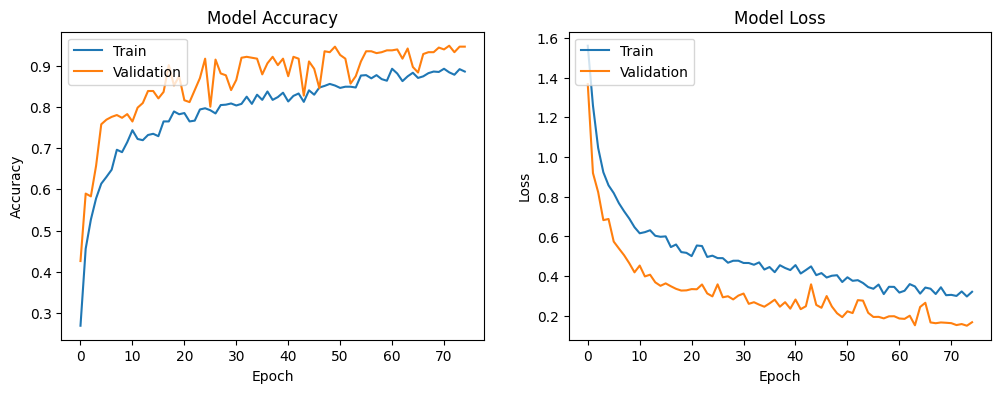

In [59]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [61]:
# Evaluating training data
train_loss, train_acc = classifier.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_acc * 100:.2f}%')

# Evaluating validation data
val_loss, val_acc = classifier.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9339 - loss: 0.1744   
Training Accuracy: 92.84%
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9334 - loss: 0.1675     
Validation Accuracy: 94.62%


In [63]:
test_image_path = r"C:\Users\range\Downloads\archive (13)\DATASET\TEST\goddess\00000049.jpg"

keypoints = extract_keypoints(test_image_path).flatten()
keypoints = keypoints.reshape(1, -1)
prediction = classifier.predict(keypoints)
predicted_class = le.inverse_transform([np.argmax(prediction)])
print(f'Predicted Pose: {predicted_class[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Pose: warrior2


In [ ]:
#model has predicted the image

In [65]:
def draw_keypoints_on_image(image_path, keypoints, confidence_threshold=0.3):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image_rgb.shape

    for keypoint in keypoints:
        y, x, confidence = keypoint  #
        if confidence > confidence_threshold:
            
            x_coord = int(x * width)
            y_coord = int(y * height)
            
            cv2.circle(image_rgb, (x_coord, y_coord), 5, (0, 255, 0), -1)

    return image_rgb


Keypoints shape: (17, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Pose: warrior2


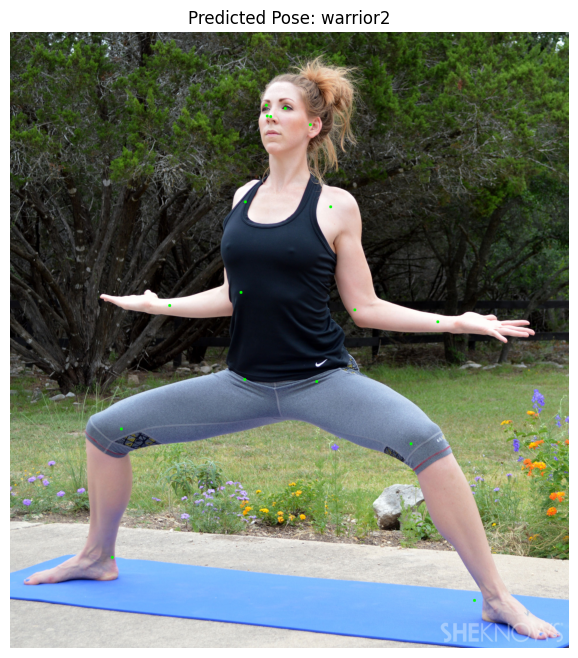

In [67]:

test_image_path = r"C:\Users\range\Downloads\archive (13)\DATASET\TEST\goddess\00000049.jpg"


keypoints = extract_keypoints(test_image_path)

print("Keypoints shape:", keypoints.shape)  
keypoints_flat = keypoints.flatten().reshape(1, -1)

prediction = classifier.predict(keypoints_flat)
predicted_class = le.inverse_transform([np.argmax(prediction)])
print(f'Predicted Pose: {predicted_class[0]}')

image_with_keypoints = draw_keypoints_on_image(test_image_path, keypoints)

plt.figure(figsize=(8, 8))
plt.imshow(image_with_keypoints)
plt.title(f'Predicted Pose: {predicted_class[0]}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Error processing C:\Users\range\Downloads\archive (13)\DATASET\TEST\downdog\00000010.png: Graph execution error:

Detected at node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6 defined at (most recent call last):
<stack traces unavailable>
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node StatefulPartitionedCall/center_net_mobile_net_v2fpn_feature_extractor/model_1/model/Conv1_relu/Relu6}}]] [Op:__inference_signature_wrapper_20201]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25m

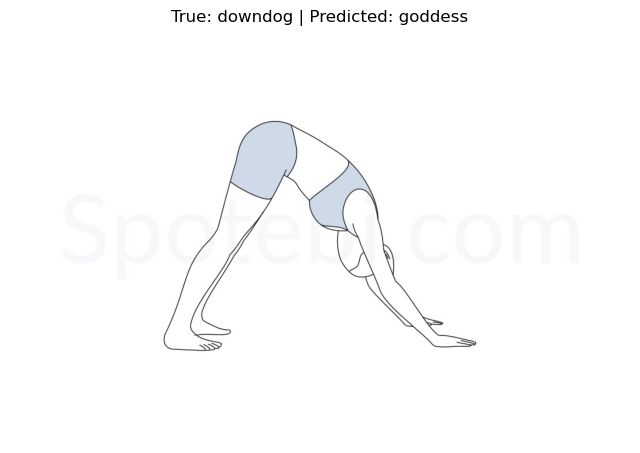

In [29]:
test_dir = r'C:\Users\range\Downloads\archive (13)\DATASET\TEST'

classes = os.listdir(test_dir)

val_image_paths = []
val_labels = []

for cls in classes:
    cls_dir = os.path.join(test_dir, cls)
    image_files = os.listdir(cls_dir)
    for img_name in image_files:
        image_path = os.path.join(cls_dir, img_name)
        val_image_paths.append(image_path)
        val_labels.append(cls)  


misclassified_examples = []

for idx, image_path in enumerate(val_image_paths):
    true_label = val_labels[idx]

    try:
        keypoints = extract_keypoints(image_path)
        if keypoints.shape != (17, 3):
            continue  

        keypoints_flat = keypoints.flatten().reshape(1, -1)

        prediction = classifier.predict(keypoints_flat)
        predicted_label_idx = np.argmax(prediction)
        predicted_label = le.inverse_transform([predicted_label_idx])[0]

        if predicted_label != true_label:
            misclassified_examples.append({
                'image_path': image_path,
                'true_label': true_label,
                'predicted_label': predicted_label,
                'keypoints': keypoints
            })
    except Exception as e:
        print(f'Error processing {image_path}: {e}')

        
if len(misclassified_examples) == 0:
    print("No misclassified examples found.")
else:
    print(f'Total misclassified examples: {len(misclassified_examples)}')

    example = misclassified_examples[0]  
    print(f"True Label: {example['true_label']}")
    print(f"Predicted Label: {example['predicted_label']}")
    print(f"Image Path: {example['image_path']}")

    image_with_keypoints = draw_keypoints_on_image(example['image_path'], example['keypoints'])

    plt.figure(figsize=(8, 8))
    plt.imshow(image_with_keypoints)
    plt.title(f"True: {example['true_label']} | Predicted: {example['predicted_label']}")
    plt.axis('off')
    plt.show()
